In [24]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
from utilsMinihackSearch import *
import operator

In [25]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "simple_maze.des",
)
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                              -------------------                               
                              |.................|                               
                              |..-----....|..|..|                               
                              |..|   |..-------.|                               
                              |..--- |.......|..|                               
                              |....| -------.|-.|                               
                           

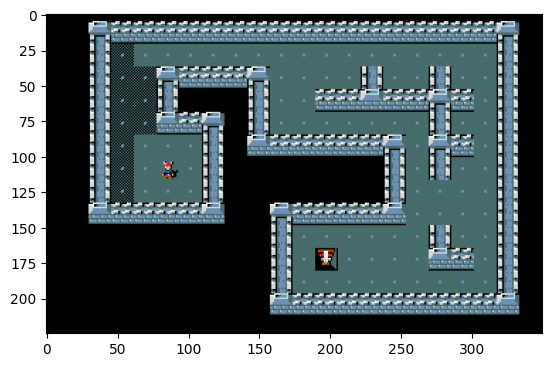

In [26]:
plt.imshow(state['pixel'][75:300, 450:800])

In [27]:
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

Agent position: (11, 33)
Target position: (15, 40)


In [33]:
import random
import time


def initialize_states(game_map: np.ndarray, start: Tuple[int, int], k: int):

    init_states = [list(random.choice(get_valid_moves(game_map, start))) for _ in range(k)]
    
    current_states = []
    for state in init_states:
        current_states.append({
            'current': state,
            'path': [state]
        })

    return current_states

def get_successors_from_states(game_map: np.ndarray, states: list):

    state_neighbors = []

    for state in states:
        neighbors = get_valid_moves(game_map, state['current'])
        state_neighbors.append({
            'path': state['path'],
            'possible_moves': neighbors
        })

    return state_neighbors

def get_heuristic_scores(heuristic: callable, neighbors: list):

    scored_moves = []

    for state in neighbors:
        for move in state['possible_moves']:
            score = heuristic(move, target)
            scored_moves.append({
                'path': state['path'],
                'current': move,
                'distance': score
            })
    
    return scored_moves

def get_next_states(scored_successors: list, k: int, stocastic: bool):
    if stocastic:
        top = []
        for _ in range(k):
            top.append(scored_successors[random.randrange(0, len(scored_successors))])
    else:
        top = sorted(scored_successors, key = lambda x: x['distance'])[:k]
    
    next_states = list()
    
    for s in top:
        next_states.append({
            'current': s['current'],
            'path': s['path'] + [s['current']]
        })

    return next_states


def local_beam_search(game_map: np.ndarray, start: Tuple[int, int], target: Tuple[int, int], heuristic: callable, k: int = 3, max_iter: int = 1000, stocastic: bool = False):

    current_states = initialize_states(game_map, start, k)
    
    for _ in range(max_iter):
        state_neighbors = get_successors_from_states(game_map, current_states)

        # check if a possible move is the target
        for state in state_neighbors:
            for move in state['possible_moves']:
                if move == target:
                   path = [start] + state['path'] + [move]
                   return path

        scored_successors = get_heuristic_scores(heuristic, state_neighbors)
        current_states = get_next_states(scored_successors, k, stocastic)

    return [start] + current_states[0]['path']


path = local_beam_search(game_map, get_player_location(game_map), get_target_location(game_map), manhattan_distance, stocastic=False)
path

[(11, 33),
 [11, 34],
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),
 (12, 33),
 (12, 34),

In [34]:
actions = actions_from_path(start, path[1:])

RuntimeError: Called step on finished NetHack

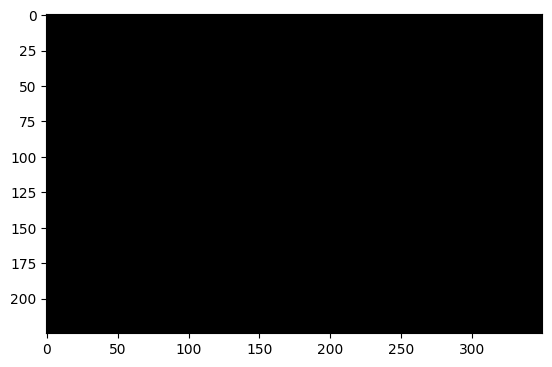

In [35]:
image = plt.imshow(state['pixel'][75:300, 450:800])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'])